In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


# Part 1: Method-ML Algorithams

In [2]:
#ML Librarires 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

# Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [3]:
#Data Read
file_path = '../input/human-activity-recognition-with-smartphones'
df=pd.read_csv(f'{file_path}/train.csv')
test=pd.read_csv(f'{file_path}/test.csv')

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865,-0.849632,-0.85215,-0.851017,-0.847971,-0.848294,...,-0.830575,-0.799426,-0.787935,-0.780362,-0.797272,-0.791883,-0.77184,-0.779133,-0.785181,-0.783267
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151,0.184823,0.18217,0.183779,0.188982,0.19031,...,0.213174,0.23549,0.24449,0.249624,0.234996,0.238604,0.252676,0.249145,0.246432,0.246809
"angle(Z,gravityMean)",-0.0586269,-0.0543167,-0.0491178,-0.0476632,-0.0438923,-0.0421264,-0.04301,-0.0419758,-0.0373639,-0.0344173,...,-0.00510524,-0.00164732,0.00953791,0.0278779,0.048907,0.0498191,0.0500526,0.0408112,0.0253395,0.0366948
subject,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30


In [5]:
df.shape

(7352, 563)

In [6]:
df = df.loc[:,~df.columns.duplicated()]

In [7]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [8]:
test = test.loc[:,~test.columns.duplicated()]

In [9]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [10]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [11]:
df.shape

(7352, 563)

In [12]:
test.shape

(2947, 563)

In [13]:
df=df.sample(frac=1).reset_index(drop=True)

In [14]:
test=test.sample(frac=1).reset_index(drop=True)

In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [16]:
test.apply(lambda x: sum(x.isnull()),axis=0)

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [17]:
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [18]:
test.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [19]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

<AxesSubplot:xlabel='Activity', ylabel='count'>

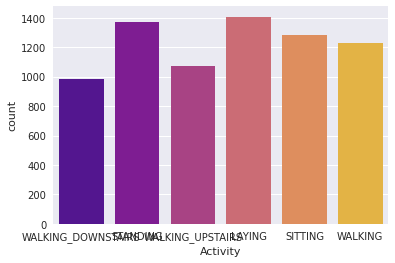

In [20]:
#checking the target variable countplot
sns.countplot(data=df,x = 'Activity',palette='plasma')

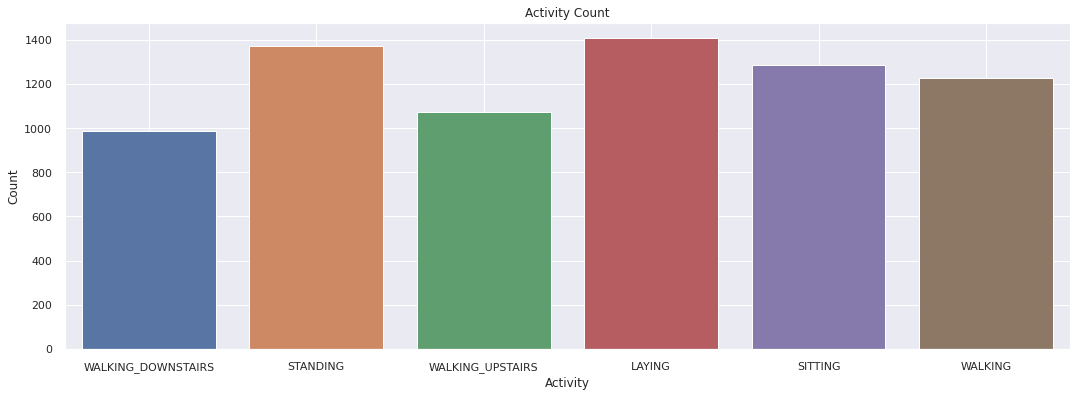

In [21]:
sns.set(rc={'figure.figsize':(18,6)})
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [22]:
pd.crosstab(df.subject, df.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [23]:
print(df.shape , test.shape)

(7352, 563) (2947, 563)


In [24]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [27]:
df=df.copy()

In [28]:
df.head(n=10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.413667,0.003216,-0.095723,0.233978,-0.182079,-0.430488,0.177548,-0.193706,-0.462795,0.616404,...,-0.624523,-0.660211,0.804284,0.970188,-0.170685,-0.851198,0.200863,0.024096,27,4
1,0.281794,-0.014159,-0.098780,-0.953150,-0.899854,-0.959204,-0.961445,-0.900192,-0.959443,-0.862438,...,-0.515811,-0.064355,0.030715,-0.807828,0.489175,-0.750181,0.270219,0.031970,3,2
2,0.258335,0.041020,-0.103226,-0.173385,0.163274,-0.207746,-0.198797,0.155301,-0.194741,0.019686,...,-0.866904,0.370702,-0.497281,0.907697,0.616864,-0.439467,0.396319,0.258642,21,5
3,0.276415,-0.011730,-0.096476,-0.947707,-0.733348,-0.787596,-0.956421,-0.757051,-0.793736,-0.864473,...,-0.032922,0.122718,-0.360638,0.343725,0.742074,-0.824828,0.215984,0.046774,6,2
4,0.267601,-0.032814,-0.113073,-0.290751,0.028228,-0.011504,-0.341515,0.043469,0.048429,-0.226421,...,-0.795217,-0.082706,0.206094,-0.917195,-0.365769,-0.616598,0.353675,0.087181,1,5
5,0.276754,-0.021467,-0.107142,-0.995801,-0.978399,-0.989484,-0.996088,-0.979657,-0.989497,-0.943117,...,-0.718192,-0.038070,0.249025,-0.295661,0.211899,-0.827045,0.182987,-0.070090,15,2
6,0.344757,-0.045966,-0.011919,-0.272351,-0.032724,0.221100,-0.357972,-0.040113,0.290947,-0.031458,...,-0.858891,-0.270300,-0.108579,-0.301490,-0.514063,-0.777428,0.250425,0.040161,30,5
7,0.277831,-0.016453,-0.109082,-0.998191,-0.990668,-0.992492,-0.998202,-0.989368,-0.992698,-0.943390,...,-0.844235,0.058502,0.094588,-0.305328,-0.611742,-0.701981,0.299024,0.063705,17,2
8,0.277569,-0.017126,-0.108930,-0.994130,-0.957471,-0.961834,-0.994913,-0.970769,-0.963193,-0.939258,...,-0.288626,-0.151400,0.035717,-0.526934,0.779435,-0.724505,0.163578,0.204390,8,2
9,0.301401,-0.005687,-0.093504,-0.029313,0.202177,-0.346313,-0.086518,0.172274,-0.358566,0.446875,...,0.025051,-0.177432,0.210472,0.662307,-0.526045,-0.666004,0.328412,0.032616,6,5


In [29]:
le = LabelEncoder()
for col in test.select_dtypes('object').columns:
    test[col] = le.fit_transform(test[col])

In [30]:
test=test.copy()

In [31]:
# Dropping the subject column because it will not affect the dataset
df = df.drop('subject',axis=1)
test = test.drop('subject',axis=1)

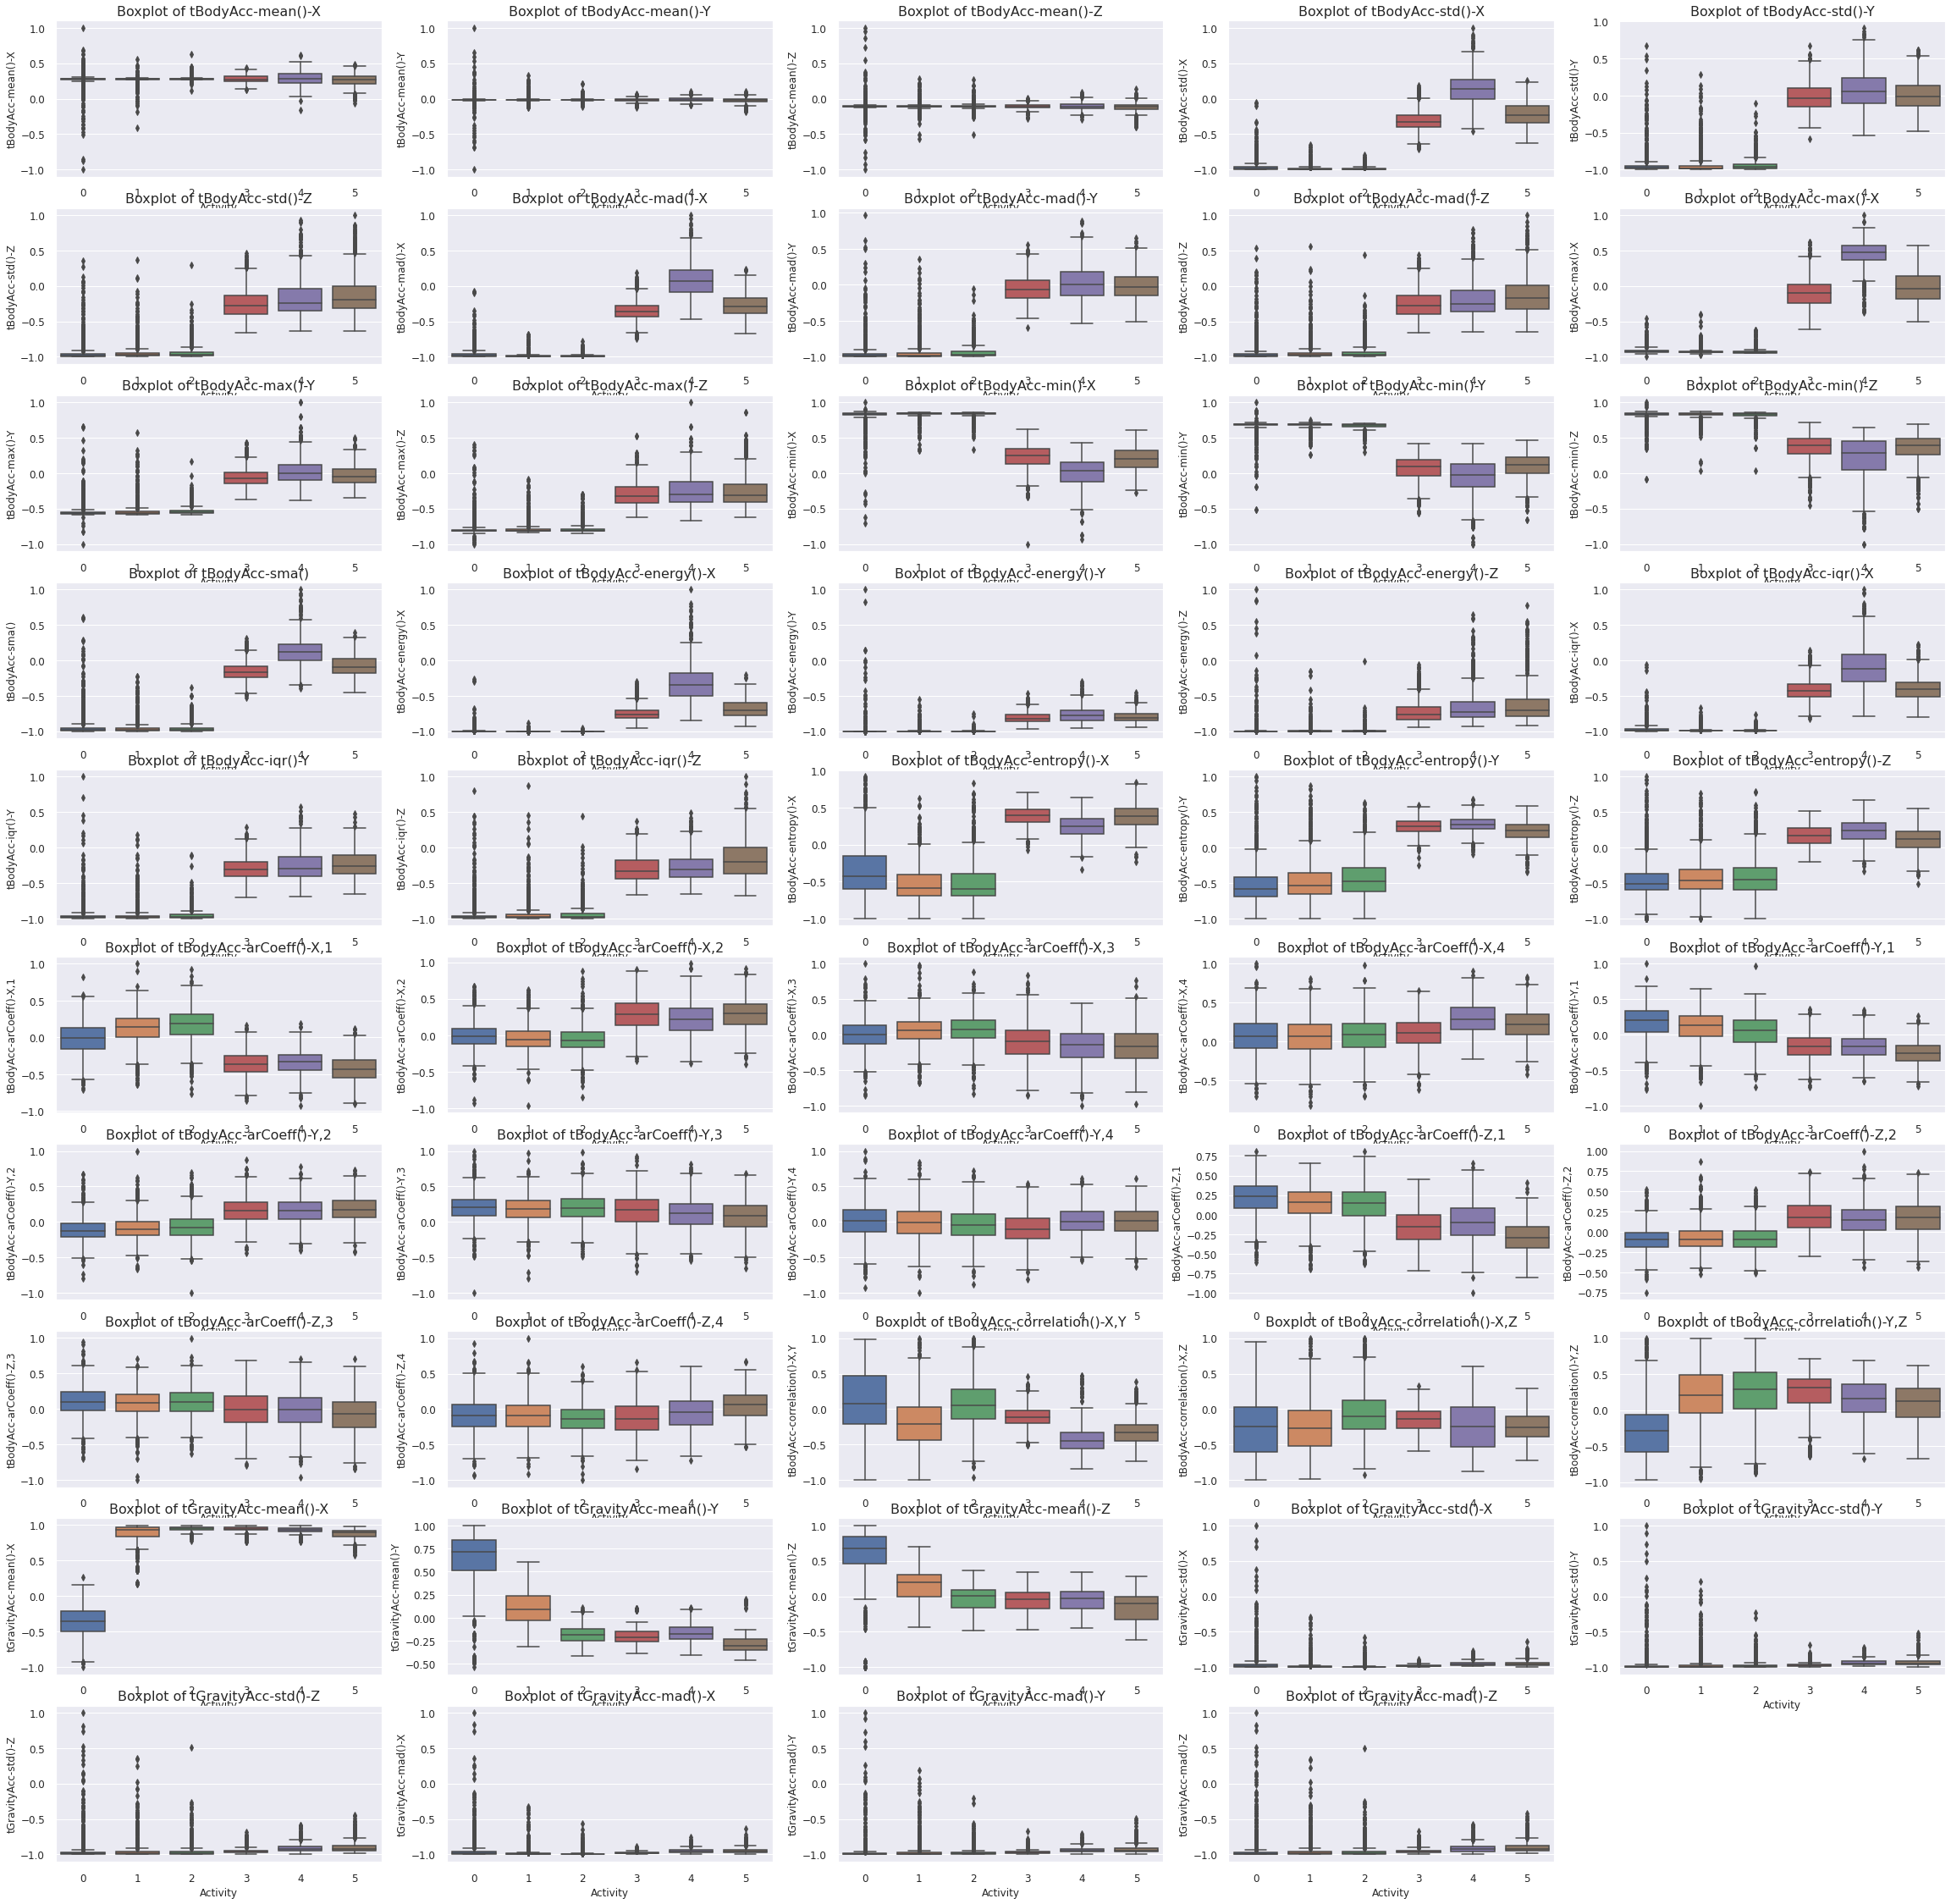

In [32]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:49]:
    plt.subplot(10,5,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Activity'])
    i+=1
plt.show()

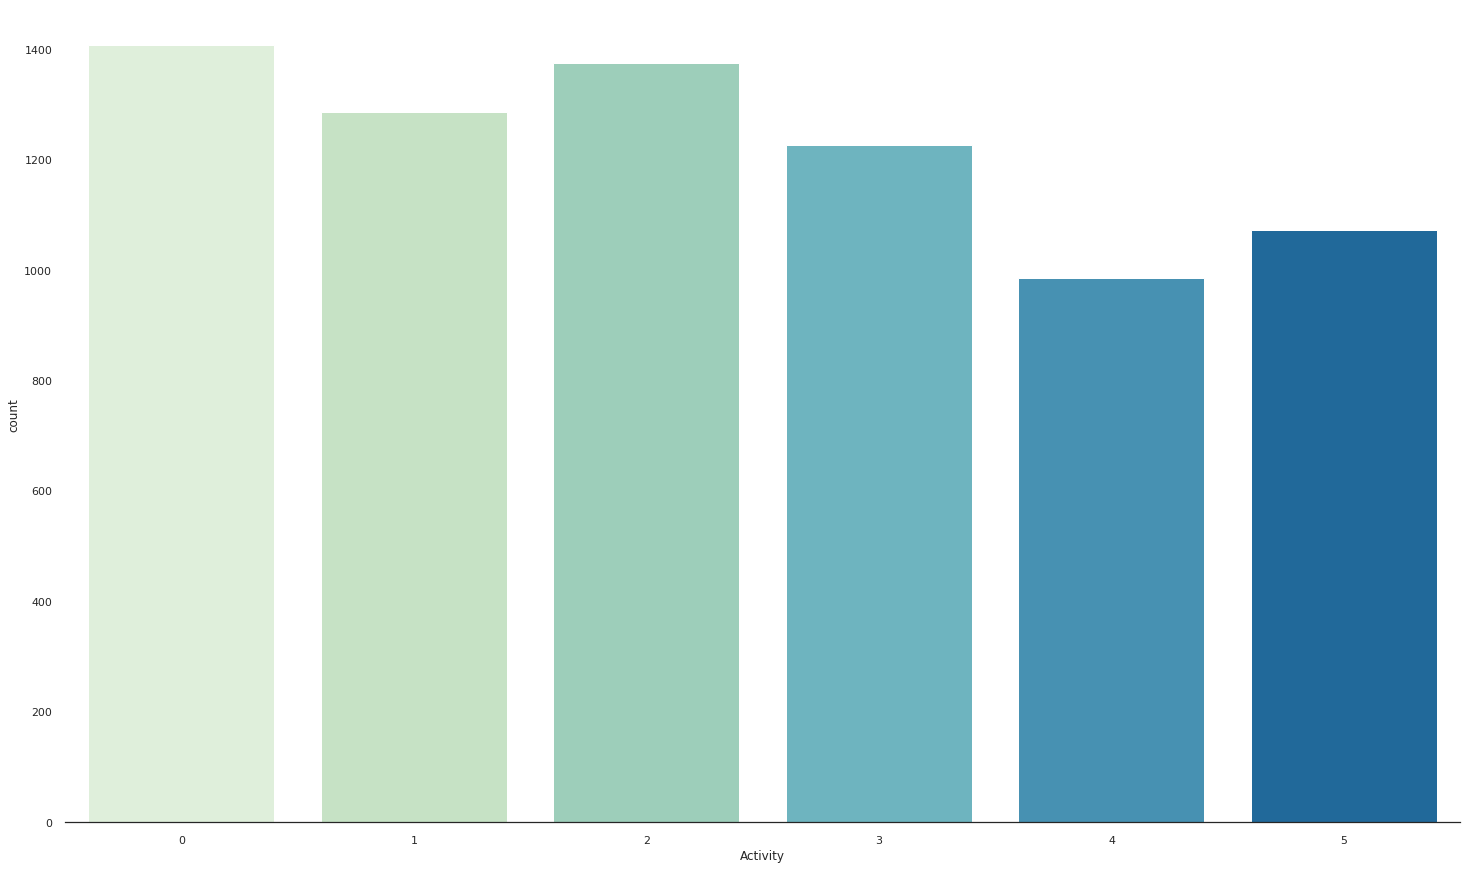

In [33]:
#checking the target variable countplot

plt.figure(figsize=(25,15))
sns.set_style('white')
sns.countplot(x='Activity', data = df, palette='GnBu')
sns.despine(left=True)

In [34]:
X_train = df.iloc[:,0:len(df.columns)-1]
y_train = df.iloc[:,-1]

In [35]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.413667,0.003216,-0.095723,0.233978,-0.182079,-0.430488,0.177548,-0.193706,-0.462795,0.616404,...,0.092037,-0.320027,-0.624523,-0.660211,0.804284,0.970188,-0.170685,-0.851198,0.200863,0.024096
1,0.281794,-0.014159,-0.098780,-0.953150,-0.899854,-0.959204,-0.961445,-0.900192,-0.959443,-0.862438,...,-0.001277,-0.137299,-0.515811,-0.064355,0.030715,-0.807828,0.489175,-0.750181,0.270219,0.031970
2,0.258335,0.041020,-0.103226,-0.173385,0.163274,-0.207746,-0.198797,0.155301,-0.194741,0.019686,...,0.274683,-0.603064,-0.866904,0.370702,-0.497281,0.907697,0.616864,-0.439467,0.396319,0.258642
3,0.276415,-0.011730,-0.096476,-0.947707,-0.733348,-0.787596,-0.956421,-0.757051,-0.793736,-0.864473,...,-0.124740,0.282889,-0.032922,0.122718,-0.360638,0.343725,0.742074,-0.824828,0.215984,0.046774
4,0.267601,-0.032814,-0.113073,-0.290751,0.028228,-0.011504,-0.341515,0.043469,0.048429,-0.226421,...,0.483363,-0.475586,-0.795217,-0.082706,0.206094,-0.917195,-0.365769,-0.616598,0.353675,0.087181


In [36]:
y_train

0       4
1       2
2       5
3       2
4       5
       ..
7347    2
7348    2
7349    1
7350    1
7351    3
Name: Activity, Length: 7352, dtype: int64

In [37]:
X_test = test.iloc[:,0:len(test.columns)-1]
y_test = test.iloc[:,-1]

In [38]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.362977,-0.043583,-0.106528,0.264535,0.963462,0.104423,0.202057,0.883848,0.079376,0.555369,...,0.081312,-0.173199,-0.560711,-0.704442,-0.694109,0.505343,0.782152,-0.766023,0.248318,0.079516
1,0.270968,-0.001800,-0.137337,-0.251967,-0.178062,-0.338271,-0.348107,-0.225208,-0.380407,0.104508,...,0.141519,-0.672845,-0.906131,0.065449,-0.933271,0.742377,0.786405,-0.707209,0.246287,0.159544
2,0.310734,-0.021955,-0.063597,-0.200438,-0.197641,-0.301255,-0.284289,-0.236458,-0.361449,0.227525,...,0.019493,0.125915,-0.133183,-0.147370,-0.196554,-0.978666,-0.875707,-0.678297,0.259041,0.175038
3,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
4,0.274506,-0.049374,-0.065572,-0.997089,-0.966474,-0.972394,-0.997578,-0.966986,-0.968745,-0.942698,...,-0.074494,-0.342341,-0.686779,-0.023319,-0.090386,0.254652,-0.205815,-0.908842,0.112031,-0.047673


In [39]:
y_test

0       4
1       4
2       4
3       2
4       2
       ..
2942    3
2943    3
2944    4
2945    3
2946    3
Name: Activity, Length: 2947, dtype: int64

In [40]:
dims = X_train.shape[1]
print(dims, 'dims')

561 dims


In [41]:
dims = X_test.shape[1]
print(dims, 'dims')

561 dims


In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using Machine Learning Algorithms

In [43]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(penalty='l2',solver='lbfgs',class_weight='balanced', max_iter=10000,random_state = 42) 
classifier.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [44]:
y_pred = classifier.predict(X_test)


In [45]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[533   0   4   0   0   0]
 [  1 428  59   0   0   3]
 [  0  14 518   0   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   7 397  16]
 [  0   0   0  22   1 448]]


In [46]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

print(y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.97      0.87      0.92       491
           2       0.89      0.97      0.93       532
           3       0.94      0.99      0.97       496
           4       0.99      0.95      0.97       420
           5       0.96      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Accuracy: 95.58873430607397
[4 4 4 ... 4 3 3]


Part 2: # Deep Neural Networks